# 1. Business Task
Cyclistic is a company based on Chicago looking for how to keep growing in the future. Their business is based on different bike rental plans:

-Single-ride pass.

-Full-day pass.

-Annual membership.

We are going to analyse how annual members (Annual membership) differ from casual riders (Single pass and Full-day pass) using Cyclistic, in order to help the organization design marketing strategies aimed at converting casual riders into annual members. 

Annual members are more profitable than casual riders, so stakeholders believe that increasing the amount of annual riders is key for Cyclistic's growth in the future.

# 2. Data Preparation

The data used is internally collected monthly data from August 2021 to July 2022 by Cyclistic from their users. We assume the data is reliable and original since it comes from the company. The data is current since it's from the past 12 months, and it is cited because we can check for documentation about the meaning of each column and because it has been used in other projects..

The data is stored by the company on AWS' S3 cloud object storaged solution in dot zip files.

https://divvy-tripdata.s3.amazonaws.com/index.html

In general the data contains anonymous user information regarding ride identification, starting and ending time of the ride, the starting and ending station of the ride, and the user type of the ride. That will be useful to analyze the difference in behavior from casual user and annual members.

The data it's stored in the structured data format. However, there is data missing in some columns.


#### Storing the data
0. The zip files were stored in the 'dot zip files' folder.

1. The zip files were uncompressed, in an individual carpet for each time period, in the 'csv files' folder.

2. The csv files containg information about the Byke Trips were copied to the 'raw data' folder.



#### Understanding the data
The "Trips" table contained the following columns:

- ride_id: String identification of the trip.

- rideable_type: Bike category used during the trip.

- started_at: Datetime of the starting time of the bike trip.

- ended_at: Datetime of the ending time of the bike trip.

- start_station_name: Name of the starting point station of the trip.

- start_station_id: Number identification of the starting point station of the trip.

- end_station_name: Name of the ending point station of the trip.

- end_station_id: Number identification of the ending point station of the trip.

- start_lat: Latitude point of the starting station of the trip.

- start_lng: Longitude point of the starting station of the trip.

- end_lat: Latitude point of the ending station of the trip.

- end_lng: Longitude point of the ending station of the trip.

- member_casual: Refers to the User Type of the trip. Category 'casual' refers to single-ride pass and full-day pass users. The 'member' category refers to users with annual memberships.

# 3. Data Processing



### Log of changes:

1. All the csv files for the months from August 2021 to August 2022 were concatenated into a single pandas dataframe.
2. Trips with duplicated rows of ride_id were dropped from the dataframe.
3. After that the ride_id columns was dropped from the dataframe.
4. Rows that had missing values for the start and end point coordinates ('start_lat', 'start_lng', 'end_lat', 'end_lng') were dropped.
5. Rows with empty data in the 'started_at' and 'ended_at' columns were dropped.
6. Columns 'started_at' and 'ended_at' were converted to the datetime data type using pandas.
7. Rows that had a greater 'started_at' values than their 'ended_at' were filtered out from the dataframe.
8. The 'start_station_id' and 'end_station_id' columns were dropped from the dataframe.
9. Two rows that had their start_station_name and end_station_name manually converted to 'Mulligan Ave & Wellington Ave' because their name was mixed up with the station_id (value originally was '351').
10. 4.22% of the missing values for 'end_station_name' and 5.50% of the missing values for 'start_station_name' were filled out matching station names with their coordinate points.
11. The 'trip_duration' column was created substracting the 'ended_at' time for the 'started_at' time for each row.
12. Rows that had a 'trip_duration' of less or equal than 1 minute long were filtered out.
13. The 'day_of_the_week' column was created to point out the number of the day of the week from when the trip 'started_at'.
17. The cleaned dataframe was saved as a .csv file in the 'clean data' folder.


#### Data cleaning and Processing with Python and Pandas
The changes made to the data were done in the following code chunks

In [109]:
#Imported the necessary libraries
import pandas as pd
import numpy as np

In [110]:
#Load the data with pandas for each month (From August 2021 to July 2022)
trips_2021_08 = pd.read_csv('data/raw data/202108-divvy-tripdata.csv')
trips_2021_09 = pd.read_csv('data/raw data/202109-divvy-tripdata.csv')
trips_2021_10 = pd.read_csv('data/raw data/202110-divvy-tripdata.csv')
trips_2021_11 = pd.read_csv('data/raw data/202111-divvy-tripdata.csv')
trips_2021_12 = pd.read_csv('data/raw data/202112-divvy-tripdata.csv')
trips_2022_01 = pd.read_csv('data/raw data/202201-divvy-tripdata.csv')
trips_2022_02 = pd.read_csv('data/raw data/202202-divvy-tripdata.csv')
trips_2022_03 = pd.read_csv('data/raw data/202203-divvy-tripdata.csv')
trips_2022_04 = pd.read_csv('data/raw data/202204-divvy-tripdata.csv')
trips_2022_05 = pd.read_csv('data/raw data/202205-divvy-tripdata.csv')
trips_2022_06 = pd.read_csv('data/raw data/202206-divvy-tripdata.csv')
trips_2022_07 = pd.read_csv('data/raw data/202207-divvy-tripdata.csv')
trips_2022_08 = pd.read_csv('data/raw data/202201-divvy-tripdata.csv')

In [111]:
#Looking inside the data from August 2021 we can see there are rows with missing values in several columns
trips_2021_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804352 entries, 0 to 804351
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             804352 non-null  object 
 1   rideable_type       804352 non-null  object 
 2   started_at          804352 non-null  object 
 3   ended_at            804352 non-null  object 
 4   start_station_name  715894 non-null  object 
 5   start_station_id    715894 non-null  object 
 6   end_station_name    710237 non-null  object 
 7   end_station_id      710237 non-null  object 
 8   start_lat           804352 non-null  float64
 9   start_lng           804352 non-null  float64
 10  end_lat             803646 non-null  float64
 11  end_lng             803646 non-null  float64
 12  member_casual       804352 non-null  object 
dtypes: float64(4), object(9)
memory usage: 79.8+ MB


By using the info() function we know the data doesn't have any empty values for the datetime columns, but there's missing data regarding the station name's and coordinate points.

In [112]:
#Adding the month is useful to latter concatenate them into a dataframe
trips_by_month = [
    trips_2021_08,
    trips_2021_09,
    trips_2021_10,
    trips_2021_11,
    trips_2021_12,
    trips_2022_01,
    trips_2022_02,
    trips_2022_03,
    trips_2022_04,
    trips_2022_05,
    trips_2022_06,
    trips_2022_07,
    trips_2022_08
    ]

In [113]:
#We can once more check that all the dataframes have the same number of columns
for month in trips_by_month:
    print(month.shape[1])

13
13
13
13
13
13
13
13
13
13
13
13
13


In [114]:
#Merged all the data into a single dataframe

trips_2021_2022 = pd.concat(trips_by_month)

In [115]:
#All the merged data is 6005233 rows and 13 columns
trips_2021_2022.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6005233 entries, 0 to 103769
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             6005233 non-null  object 
 1   rideable_type       6005233 non-null  object 
 2   started_at          6005233 non-null  object 
 3   ended_at            6005233 non-null  object 
 4   start_station_name  5128187 non-null  object 
 5   start_station_id    5128189 non-null  object 
 6   end_station_name    5067410 non-null  object 
 7   end_station_id      5067410 non-null  object 
 8   start_lat           6005233 non-null  float64
 9   start_lng           6005233 non-null  float64
 10  end_lat             5999557 non-null  float64
 11  end_lng             5999557 non-null  float64
 12  member_casual       6005233 non-null  object 
dtypes: float64(4), object(9)
memory usage: 641.4+ MB


In [116]:
trips_2021_2022.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.770000,-87.680000,member
1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.770000,-87.630000,member
2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.970000,-87.660000,member
3,5834D3208BFAF1DA,electric_bike,2021-08-21 06:52:55,2021-08-21 07:08:13,NaN,NaN,NaN,NaN,41.97,-87.67,41.950000,-87.650000,member
4,CD825CB87ED1D096,electric_bike,2021-08-19 11:55:29,2021-08-19 12:04:11,NaN,NaN,NaN,NaN,41.79,-87.60,41.770000,-87.620000,member
5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.800000,-87.600000,member
6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.810000,-87.610000,member
7,C67017767EED2251,electric_bike,2021-08-13 14:52:35,2021-08-13 14:58:16,NaN,NaN,Clark St & Grace St,TA1307000127,41.94,-87.64,41.950874,-87.659146,member
8,ABC4532F2B4983AB,electric_bike,2021-08-17 18:23:55,2021-08-17 18:24:13,NaN,NaN,NaN,NaN,41.92,-87.66,41.920000,-87.660000,member
9,82437E52DC3B9A8A,electric_bike,2021-08-04 12:50:53,2021-08-04 13:08:20,NaN,NaN,NaN,NaN,41.74,-87.53,41.740000,-87.530000,member


We will start by checking if there aren't any trips with duplicated ride_id's

In [117]:
original_number_ride_ids = len(trips_2021_2022['ride_id'])
non_duplicated_ride_ids = len(trips_2021_2022['ride_id'].drop_duplicates())
number_of_duplicated_ids = original_number_ride_ids - non_duplicated_ride_ids
number_of_duplicated_ids # 103770 trips with duplicated ride_id's

103770

Since ride_id's are supposed to be unique for each trip, we will drop the rows that have duplicated ride_id's

In [118]:
trips_2021_2022.drop_duplicates(subset=['ride_id'], inplace=True)

In [119]:
#We will drop the ride_id column now that we now that we've deleted duplicates since this column is not necessary for the analysis
trips_2021_2022.drop(columns=['ride_id'], inplace=True)

We know there's a lot of missing data regarding station names and geographical points.

Since we it could be useful to use geographical data to map each the Stations by trip

we will delete the rows that have missing data in the

'start_lat', 'start_lng', 'end_lat', and 'end_lng' columns.

In [120]:
trips_2021_2022 = trips_2021_2022[trips_2021_2022['start_lat'].notna()]
trips_2021_2022 = trips_2021_2022[trips_2021_2022['start_lng'].notna()]
trips_2021_2022 = trips_2021_2022[trips_2021_2022['end_lat'].notna()]
trips_2021_2022 = trips_2021_2022[trips_2021_2022['end_lng'].notna()]

#If we we didn't want to plot the stations by trips we would drop all the following columns:
#trips_2021_2022.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng'], inplace=True)

In [121]:
trips_2021_2022.info(verbose=True, show_counts=True)
#By dropping the empty geographical points we've reduced the data by 0.1%.
# We've gone from 6005233 rows to 5999557 rows.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5895873 entries, 0 to 823487
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   rideable_type       5895873 non-null  object 
 1   started_at          5895873 non-null  object 
 2   ended_at            5895873 non-null  object 
 3   start_station_name  5035087 non-null  object 
 4   start_station_id    5035089 non-null  object 
 5   end_station_name    4981567 non-null  object 
 6   end_station_id      4981567 non-null  object 
 7   start_lat           5895873 non-null  float64
 8   start_lng           5895873 non-null  float64
 9   end_lat             5895873 non-null  float64
 10  end_lng             5895873 non-null  float64
 11  member_casual       5895873 non-null  object 
dtypes: float64(4), object(8)
memory usage: 584.8+ MB


In [122]:
#Since we're insterested to know the behaviour of the users, 
# we will drop the rows with empty data in the 'started_at', 'ended_at' columns.
trips_2021_2022 = trips_2021_2022[trips_2021_2022['started_at'].notna()]
trips_2021_2022 = trips_2021_2022[trips_2021_2022['ended_at'].notna()]

In [123]:
#Converting the 'started_at' and 'ended_at' columns to datatime format
trips_2021_2022['started_at'] = pd.to_datetime(trips_2021_2022['started_at'])
trips_2021_2022['ended_at'] = pd.to_datetime(trips_2021_2022['ended_at'])

In [124]:
#Now we've changed the data type of the time columns
trips_2021_2022.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5895873 entries, 0 to 823487
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   rideable_type       5895873 non-null  object        
 1   started_at          5895873 non-null  datetime64[ns]
 2   ended_at            5895873 non-null  datetime64[ns]
 3   start_station_name  5035087 non-null  object        
 4   start_station_id    5035089 non-null  object        
 5   end_station_name    4981567 non-null  object        
 6   end_station_id      4981567 non-null  object        
 7   start_lat           5895873 non-null  float64       
 8   start_lng           5895873 non-null  float64       
 9   end_lat             5895873 non-null  float64       
 10  end_lng             5895873 non-null  float64       
 11  member_casual       5895873 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 584.8+ MB


In [125]:
#We will also filter out rows whos started_at time is greater than its ended_at time
trips_2021_2022 = trips_2021_2022[trips_2021_2022['started_at'] < trips_2021_2022['ended_at']]

In [126]:
trips_2021_2022.info(verbose=True, show_counts=True)
#We got rid of 636 rows that had wrong values for the started_at and ended_at times

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5895237 entries, 0 to 823487
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   rideable_type       5895237 non-null  object        
 1   started_at          5895237 non-null  datetime64[ns]
 2   ended_at            5895237 non-null  datetime64[ns]
 3   start_station_name  5034483 non-null  object        
 4   start_station_id    5034485 non-null  object        
 5   end_station_name    4981280 non-null  object        
 6   end_station_id      4981280 non-null  object        
 7   start_lat           5895237 non-null  float64       
 8   start_lng           5895237 non-null  float64       
 9   end_lat             5895237 non-null  float64       
 10  end_lng             5895237 non-null  float64       
 11  member_casual       5895237 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 584.7+ MB


Now we want to know how many different Starting and Ending stations are saved in the data 

In [127]:
#We can see there are 1380 different Starting Stations
trips_2021_2022['start_station_name'].value_counts().shape

(1381,)

In [128]:
#We can see there are 1392 different Ending Stations
trips_2021_2022['end_station_name'].value_counts().shape

(1396,)

In [129]:
#Not all Starting Stations are identifiable by their id
trips_2021_2022['start_station_id'].value_counts().shape

(1226,)

In [130]:
#Not all Ending Stations are identifiable by their id
trips_2021_2022['end_station_id'].value_counts().shape

(1236,)

Since the station's id is not necessary for the analysis we will drop those columns as well

In [131]:
trips_2021_2022.drop(columns=['start_station_id', 'end_station_id'], inplace=True)

In [132]:
#We sort the values by alphabetic order and look for unique values
start_names = trips_2021_2022.sort_values(by=['start_station_name'], ascending=True)
end_names = trips_2021_2022.sort_values(by=['end_station_name'], ascending=True)
start_names = set(start_names.start_station_name)
end_names = set(end_names.end_station_name)

Let's find if there's some error in the difference between the amount of Start Station names and End Station names.


In [133]:
#Let's find if there's some error in the difference between the amount of Start Station names and End Station names
start_names.difference(end_names)

#There's at least one station whos Start Name seems weird, '351'.

{'351',
 'Buffalo Ave & 133rd St',
 'Hale Ave & 111th St',
 'Keef Ave & South Chicago Ave',
 'Lamon Ave & Archer Ave',
 'Oglesby Ave & 105th St',
 'Public Rack - La Moyne Ave and Leamington Ave',
 'Public Rack - Western Ave & 98th St',
 'WestChi'}

In [134]:
trips_2021_2022[trips_2021_2022['start_station_name']=='351']
# We can see those rows have the same starting and ending station because of their coordinates

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
80741,electric_bike,2021-08-04 16:31:29,2021-08-04 16:48:33,351,Mulligan Ave & Wellington Ave,41.93,-87.78,41.93,-87.78,casual
606661,electric_bike,2021-08-07 23:59:38,2021-08-08 00:37:58,351,NaN,41.93,-87.78,41.94,-87.79,casual


In [135]:
#We are going to manually update the start_station_name and end_station_name for the above rows
trips_2021_2022.loc[80741, 'start_station_name'] = 'Mulligan Ave & Wellington Ave'
trips_2021_2022.loc[606661, 'start_station_name'] = 'Mulligan Ave & Wellington Ave'
trips_2021_2022.loc[606661, 'end_station_name'] = 'Mulligan Ave & Wellington Ave'

In [136]:
#We know check the amount of missing values in the starting station name column
trips_2021_2022['start_station_name'].isna().sum() 
#860753 rows with null values

860753

In [137]:
#We know check the amount of missing values in the ending station name column
trips_2021_2022['end_station_name'].isna().sum() 
#913953 rows with null values

913953

In [138]:
trips_2021_2022.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5895237 entries, 0 to 823487
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   rideable_type       5895237 non-null  object        
 1   started_at          5895237 non-null  datetime64[ns]
 2   ended_at            5895237 non-null  datetime64[ns]
 3   start_station_name  5034484 non-null  object        
 4   end_station_name    4981284 non-null  object        
 5   start_lat           5895237 non-null  float64       
 6   start_lng           5895237 non-null  float64       
 7   end_lat             5895237 non-null  float64       
 8   end_lng             5895237 non-null  float64       
 9   member_casual       5895237 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 527.0+ MB


Since we can't ask the stakeholders if they're willing to delete the missing data for the analysis, it's up to us to decide.

One way we can get around this problem is trying to match the most amount of the station names given their longitude and latitude positions, because we've already made sure that the remaining rows have values for their end and start coordinates.

We can fill out the missing values doing the following. For each row that doesn't have a station name, and does have longitude and latitude values, we can check for rows that have matching longitud and latitude values and don't have their station name missing and copy their station name into the row. This can be done for the start_station_name and end_station_name.

Filling out some of the station names with those that have matching coordinates.

In [139]:
#For the End Station names
trips_2021_2022['end_station_name'] = trips_2021_2022['end_station_name'].fillna(trips_2021_2022.groupby(['end_lat','end_lng'])['end_station_name'].transform('first'))

In [140]:
#For the Start Station names
trips_2021_2022['start_station_name'] = trips_2021_2022['start_station_name'].fillna(trips_2021_2022.groupby(['start_lat','start_lng'])['start_station_name'].transform('first'))

In [141]:
trips_2021_2022.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5895237 entries, 0 to 823487
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   rideable_type       5895237 non-null  object        
 1   started_at          5895237 non-null  datetime64[ns]
 2   ended_at            5895237 non-null  datetime64[ns]
 3   start_station_name  5501864 non-null  object        
 4   end_station_name    5365881 non-null  object        
 5   start_lat           5895237 non-null  float64       
 6   start_lng           5895237 non-null  float64       
 7   end_lat             5895237 non-null  float64       
 8   end_lng             5895237 non-null  float64       
 9   member_casual       5895237 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 527.0+ MB


In [142]:
#There doesn't seem to be a problem with the names of the End Stations
end_names.difference(start_names)


{'10101 S Stony Island Ave',
 'Bennett Ave & 96th St',
 'Corliss Ave & 133rd St',
 'DIVVY CASSETTE REPAIR MOBILE STATION',
 'Ellis Ave & 132nd Pl',
 'Halsted St & 64th St',
 'James Madison School',
 'Keeler Ave & 26th St',
 'Kildare Ave & Division Ave',
 'Linder Ave & Archer Ave',
 'Michele Clark Magnet High School',
 'Normal Blvd & 61st Pl',
 'Orville T Bright School',
 'Park Manor Elementary School',
 'Parnell Ave & 98th St',
 'Percy Julian HS',
 'Public Rack - California Ave & Touhy Ave - SW',
 'Public Rack - Foster Ave & Drake Ave',
 'Public Rack - Keeler Ave & 26th St',
 'Pullman Community Center',
 'South Shore High School',
 'The Montessori School of Englewood',
 'Torrence Ave & 98th St',
 'William Rainey Harper High School'}

In [143]:
trips_2021_2022.head(10)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,None,None,41.77,-87.68,41.770000,-87.680000,member
1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,None,None,41.77,-87.68,41.770000,-87.630000,member
2,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,None,None,41.95,-87.65,41.970000,-87.660000,member
3,electric_bike,2021-08-21 06:52:55,2021-08-21 07:08:13,None,None,41.97,-87.67,41.950000,-87.650000,member
4,electric_bike,2021-08-19 11:55:29,2021-08-19 12:04:11,Mulligan Ave & Wellington Ave,Calumet Ave & 71st St,41.79,-87.60,41.770000,-87.620000,member
5,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,Forrestville Ave & 47th St,Mulligan Ave & Wellington Ave,41.81,-87.61,41.800000,-87.600000,member
6,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,Calumet Ave & 71st St,Forrestville Ave & 47th St,41.77,-87.62,41.810000,-87.610000,member
7,electric_bike,2021-08-13 14:52:35,2021-08-13 14:58:16,W Oakdale Ave & N Broadway,Clark St & Grace St,41.94,-87.64,41.950874,-87.659146,member
8,electric_bike,2021-08-17 18:23:55,2021-08-17 18:24:13,None,None,41.92,-87.66,41.920000,-87.660000,member
9,electric_bike,2021-08-04 12:50:53,2021-08-04 13:08:20,Steelworkers Park,Steelworkers Park,41.74,-87.53,41.740000,-87.530000,member


In [144]:
#We add a new column called 'trip_duration', since this is an important feature we can look into by user type
trips_2021_2022['trip_duration'] = trips_2021_2022['ended_at'] - trips_2021_2022['started_at']

In [145]:
#We will check how many trips lasted more than 1 day and see if they're relevant for the data
trips_2021_2022.loc[(trips_2021_2022['trip_duration'] > '24:00:00')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 22721 to 753245
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   rideable_type       554 non-null    object         
 1   started_at          554 non-null    datetime64[ns] 
 2   ended_at            554 non-null    datetime64[ns] 
 3   start_station_name  554 non-null    object         
 4   end_station_name    514 non-null    object         
 5   start_lat           554 non-null    float64        
 6   start_lng           554 non-null    float64        
 7   end_lat             554 non-null    float64        
 8   end_lng             554 non-null    float64        
 9   member_casual       554 non-null    object         
 10  trip_duration       554 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(4), timedelta64[ns](1)
memory usage: 51.9+ KB


In [146]:
#There are only 554 trips that lasted more than 1 day, that is less than 0.0092% of the data.
# So we will only keep data that lasted less or equal than a 1 day
trips_2021_2022 = trips_2021_2022.loc[(trips_2021_2022['trip_duration'] <= '24:00:00')]

In [147]:
#We will also filter the data by keeping trips that lasted more than 1 minute
trips_2021_2022 = trips_2021_2022.loc[(trips_2021_2022['trip_duration'] > '00:01:00')]

In [148]:
#We will transform the trip duration values to count the trip duration in minutes
trips_2021_2022['trip_duration'] = trips_2021_2022['trip_duration'].dt.total_seconds()/60
trips_2021_2022['trip_duration'] = trips_2021_2022['trip_duration'].round(2)

In [149]:
#We add one more column to indicate the day of the week when the trip started.
trips_2021_2022['day_of_the_week'] = trips_2021_2022['started_at'].dt.dayofweek

In [150]:
trips_2021_2022.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5789725 entries, 0 to 823487
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   rideable_type       5789725 non-null  object        
 1   started_at          5789725 non-null  datetime64[ns]
 2   ended_at            5789725 non-null  datetime64[ns]
 3   start_station_name  5409851 non-null  object        
 4   end_station_name    5280873 non-null  object        
 5   start_lat           5789725 non-null  float64       
 6   start_lng           5789725 non-null  float64       
 7   end_lat             5789725 non-null  float64       
 8   end_lng             5789725 non-null  float64       
 9   member_casual       5789725 non-null  object        
 10  trip_duration       5789725 non-null  float64       
 11  day_of_the_week     5789725 non-null  int64         
dtypes: datetime64[ns](2), float64(5), int64(1), object(4)
memory usage: 574

In [151]:
#Checking the new column
trips_2021_2022.head(10)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,day_of_the_week
0,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,None,None,41.77,-87.68,41.770000,-87.680000,member,6.92,1
1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,None,None,41.77,-87.68,41.770000,-87.630000,member,16.17,1
2,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,None,None,41.95,-87.65,41.970000,-87.660000,member,16.22,5
3,electric_bike,2021-08-21 06:52:55,2021-08-21 07:08:13,None,None,41.97,-87.67,41.950000,-87.650000,member,15.30,5
4,electric_bike,2021-08-19 11:55:29,2021-08-19 12:04:11,Mulligan Ave & Wellington Ave,Calumet Ave & 71st St,41.79,-87.60,41.770000,-87.620000,member,8.70,3
5,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,Forrestville Ave & 47th St,Mulligan Ave & Wellington Ave,41.81,-87.61,41.800000,-87.600000,member,6.58,3
6,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,Calumet Ave & 71st St,Forrestville Ave & 47th St,41.77,-87.62,41.810000,-87.610000,member,15.68,3
7,electric_bike,2021-08-13 14:52:35,2021-08-13 14:58:16,W Oakdale Ave & N Broadway,Clark St & Grace St,41.94,-87.64,41.950874,-87.659146,member,5.68,4
9,electric_bike,2021-08-04 12:50:53,2021-08-04 13:08:20,Steelworkers Park,Steelworkers Park,41.74,-87.53,41.740000,-87.530000,member,17.45,2
10,electric_bike,2021-08-01 18:11:35,2021-08-01 18:17:05,Troy St & Grace St,Kedzie Ave & Argyle St,41.95,-87.71,41.970000,-87.710000,member,5.50,6


Saving the cleaned dataframe

In [152]:
trips_2021_2022.to_csv('data/clean data/trips_2021_2022.csv')

We initially had a little more of 6 millions rows of data (6005233).

After cleaning, filtering and formatting the data we now are left with 5.79 million rows of data (5790279).

That means we've kept 96.43% of the original data for the columns 'rideable_type', 'started_at', 'ended_at', 'start_lat', 'start_lng', 'end_lat', 'end_lng', and 'member_casual'.

It's worth nothing that we were able to identify 282k rows of Start Station names (282218) and 213k rows of End Station names (213977), improving the data for those columns by 5.50% and 4.22% respectively.

# 4. Analyze the data

If there is not enough memory, consider deleting all variables for the Analyze step.

In [153]:
%reset

In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading the data
trips_2021_2022 = pd.read_csv('data/clean data/trips_2021_2022.csv')
#We will have to change the data type of the start and end time, since we had to re load the cleaned data.
trips_2021_2022['started_at'] = pd.to_datetime(trips_2021_2022['started_at'])
trips_2021_2022['ended_at'] = pd.to_datetime(trips_2021_2022['ended_at'])

In [3]:
trips_2021_2022.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789725 entries, 0 to 5789724
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Unnamed: 0          5789725 non-null  int64         
 1   rideable_type       5789725 non-null  object        
 2   started_at          5789725 non-null  datetime64[ns]
 3   ended_at            5789725 non-null  datetime64[ns]
 4   start_station_name  5409851 non-null  object        
 5   end_station_name    5280873 non-null  object        
 6   start_lat           5789725 non-null  float64       
 7   start_lng           5789725 non-null  float64       
 8   end_lat             5789725 non-null  float64       
 9   end_lng             5789725 non-null  float64       
 10  member_casual       5789725 non-null  object        
 11  trip_duration       5789725 non-null  float64       
 12  day_of_the_week     5789725 non-null  int64         
dtypes: datetime6

Text(0.5, 1.0, 'User distribution by user type')

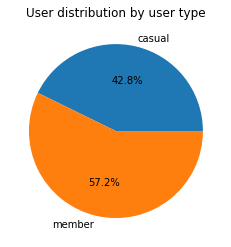

In [4]:
#Percentage of users by user category
ax = trips_2021_2022.groupby(['member_casual'])['member_casual'].count(
                    ).plot(kind='pie', autopct='%1.1f%%', ylabel='')
ax.set_title('User distribution by user type')

In [5]:
trips_year_month_user = trips_2021_2022.groupby([trips_2021_2022['started_at'].dt.year,
                        trips_2021_2022['started_at'].dt.month,
                        'member_casual'])

In [6]:
analysis1 = trips_2021_2022.groupby([trips_2021_2022['started_at'].dt.year,
                        trips_2021_2022['started_at'].dt.month])['trip_duration'].agg(['sum', 'mean', 'median', 'min', 'max', 'std', 'var']).round(2)

In [7]:
analysis1

sum   mean  median   min      max    std  \
started_at started_at                                                     
2021       8           16194931.91  20.45   12.98  1.02  1434.05  33.73   
           9           14407611.91  19.36   12.32  1.02  1439.37  33.42   
           10          10402291.32  16.76   10.55  1.02  1434.20  30.69   
           11           4773242.82  13.49    8.73  1.02  1439.85  26.42   
           12           3184529.05  13.08    8.57  1.02  1431.88  25.56   
2022       1            1303985.88  12.81    8.00  1.02  1380.00  34.39   
           2            1454779.57  12.88    8.22  1.02  1387.55  27.49   
           3            4420087.97  15.87    9.65  1.02  1435.47  31.65   
           4            5692067.24  15.66    9.65  1.02  1438.58  29.71   
           5           11733184.50  18.88   11.80  1.02  1437.70  32.45   
           6           14034899.94  18.65   12.12  1.02  1438.82  30.61   
           7           14950875.73  18.58   11.95  1.02  1439.37  29.13   

                           var  
started_at started_at           
2021       8           1137.66  
           9           1117.16  
           10           941.74  
           11           697.97  
           12           653.16  
2022       1           1182.80  
           2            755.44  
           3           1001.65  
           4            882.63  
           5           1053.00  
           6            936.81  
           7            848.31

Text(0.5, 1.0, 'Total rides per month by type of user')

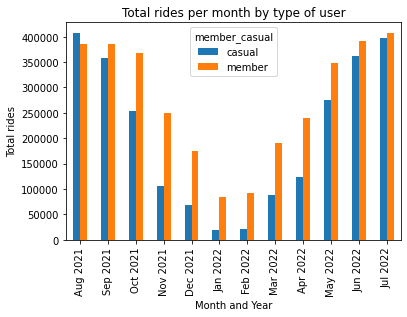

In [8]:
#Plot total rides per month by user

ax = trips_year_month_user['rideable_type'].count(
                        ).unstack().plot(kind='bar', stacked=False)

x_ticks = ['Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021', 
            'Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022', 
            'Jun 2022', 'Jul 2022']

ax.set_xticklabels(x_ticks)
ax.set_xlabel('Month and Year')
ax.set_ylabel('Total rides')
ax.set_title('Total rides per month by type of user')

Text(0.5, 1.0, 'Total minutes of trips per month by type of user')

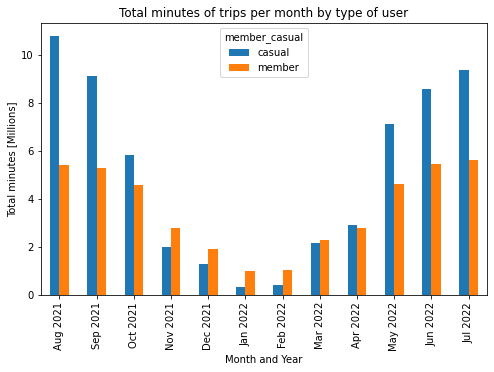

In [9]:
#Plot total minutes per month by user

ax = trips_year_month_user['trip_duration'].sum(
                        ).div(10**6).unstack().plot(kind='bar', stacked=False, figsize=(8,5))

x_ticks = ['Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021', 
            'Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022', 
            'Jun 2022', 'Jul 2022']

ax.set_xticklabels(x_ticks)
ax.set_xlabel('Month and Year')
ax.set_ylabel('Total minutes [Millions]')
ax.set_title('Total minutes of trips per month by type of user')

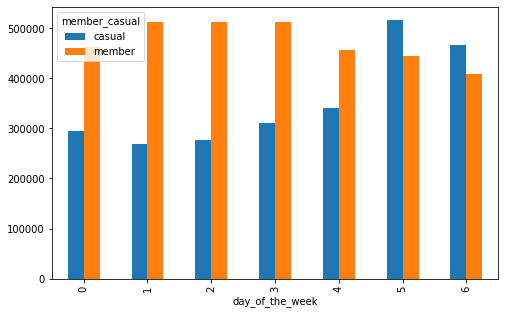

In [10]:
ax = trips_2021_2022.groupby(['day_of_the_week',
                        'member_casual'])['rideable_type'].count(
                        ).unstack().plot(kind='bar', stacked=False,
                        figsize=(8,5))


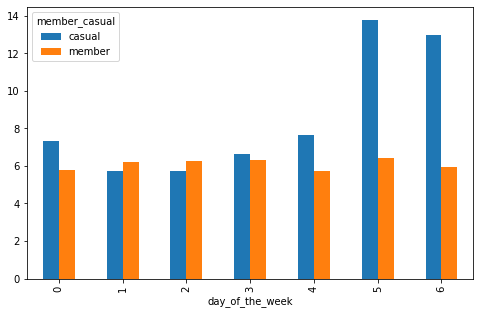

In [11]:
ax = trips_2021_2022.groupby(['day_of_the_week',
                        'member_casual'])['trip_duration'].sum(
                        ).div(10**6).unstack().plot(kind='bar', stacked=False,
                        figsize=(8,5))


We also want to know how the ride behaviours changes by user and hour of the day

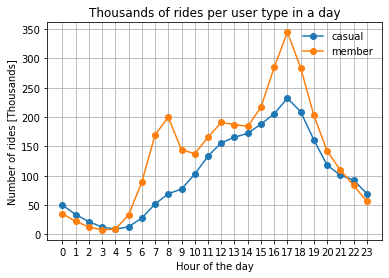

In [12]:

ax1 = trips_2021_2022.loc[trips_2021_2022['member_casual']=='casual'].groupby(
                                [trips_2021_2022['started_at'].dt.hour]).size(
                                ).div(10**3).plot(kind='line', style='o-', legend=True)


ax2 = trips_2021_2022.loc[trips_2021_2022['member_casual']=='member'].groupby(
                                [trips_2021_2022['started_at'].dt.hour]).size(
                                ).div(10**3).plot(kind='line', style='o-', grid=True)

ax2.legend(['casual', 'member'], framealpha=0)
ax2.set_title('Thousands of rides per user type in a day')
ax2.set_xlabel('Hour of the day')
ax2.set_ylabel('Number of rides [Thousands]')
ax2.set_xticks(np.arange(0, 24, 1))




Now we'll see how the type of bikes differ by user type

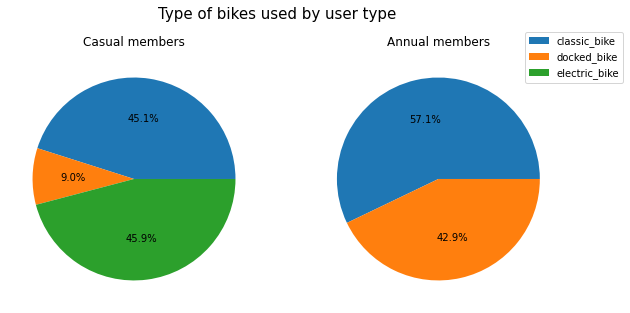

In [13]:
#Percentage of users by user type
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Type of bikes used by user type', fontsize=15)


ax1 = trips_2021_2022.loc[trips_2021_2022['member_casual']=='casual'].groupby(
                    ['rideable_type'])['rideable_type'].size(
                    ).plot(kind='pie', autopct='%1.1f%%', ylabel='', ax=axes[0],
                     legend=True, labeldistance=None, title='Casual members')

ax1.legend(bbox_to_anchor=(2.02, 1.1), loc='upper left')
ax1.colors=['blue','green', 'orange']


ax2 = trips_2021_2022.loc[trips_2021_2022['member_casual']=='member'].groupby(
                    ['rideable_type'])['rideable_type'].size(
                    ).plot(kind='pie', autopct='%1.1f%%', ylabel='', ax=axes[1], 
                    labeldistance=None, title='Annual members')
ax2.colors=['blue','orange']



Out of the named stations we we're able to indentify, we want to know which ones are the most as a start point used ones

Text(0.5, 0, 'Number of rides per station')

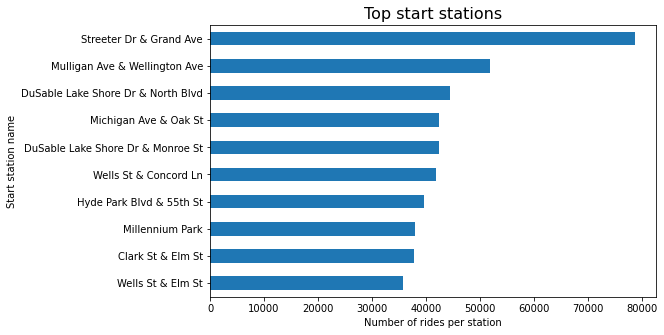

In [14]:
#Since there are 1379 starting stations for more 
#   than over 5 million rides, we will only check the top 10 most used stations
ax = trips_2021_2022.groupby(['start_station_name'])['start_station_name'].size(
                                                    ).sort_values(ascending=False)[:10]
ax = ax.plot(kind='barh', figsize=(8,5))
ax.invert_yaxis()
ax.set_title('Top start stations', fontsize=16)
ax.set_ylabel('Start station name')
ax.set_xlabel('Number of rides per station')

Now we want to know which stations are the most used and whe're they're located.

To do this we will use the geopandas library and a Shapefile of the streets of Chicago

In [15]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
#We import the shapefile of the city of Chicago
chicago_map = gpd.read_file('Chicago_streets.zip')

Text(0.5, 1.0, 'Chicago treet lines')

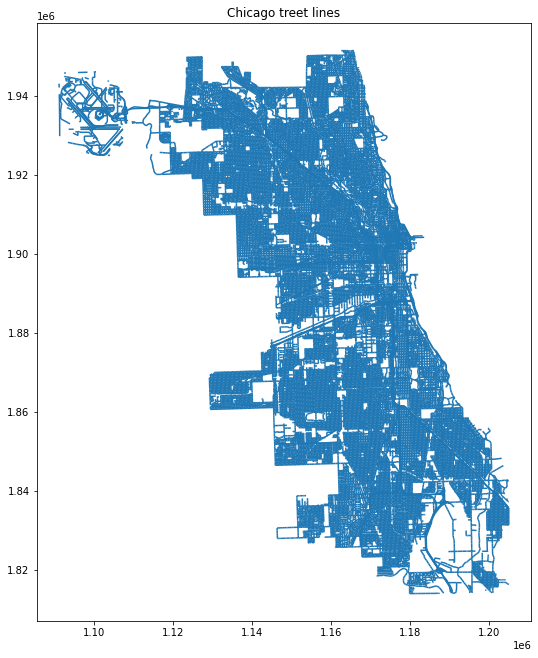

In [25]:
fig, ax = plt.subplots(figsize=(11,11))
chicago_map.plot(ax=ax)
ax.set_title('Chicago street lines')

In [30]:
#We can see that the top Starting Stations by coordinates don't match the number of trips
# of the ones we sorted by station name. 
# Earlies we discovered that by name 'Streeter Dr & Grand Ave' is the most used station as a start point.
# This difference in the data could be due to the missing names we've got in the 'start_station_name' column
# as well as some issues in the decimal points of the lat and long values.
trips_2021_2022.groupby(['start_lat', 'start_lng']).size().sort_values(ascending=False)[:10]

start_lat  start_lng 
41.892278  -87.612043    60628
41.790000  -87.600000    51358
41.911722  -87.626804    34480
41.880958  -87.616743    32345
41.926277  -87.630834    28878
                         ...  
41.887766  -87.636770        1
           -87.637085        1
           -87.755552        1
           -87.636637        1
45.635034  -73.796477        1
Length: 1661447, dtype: int64

In [43]:
#To make the analysis of the most used stations we will analyze them all together.
# To do that we'll create a new data file and we'll merge the 'start_long' and 'end_long' columns into 1 column.
# We'll also merge the 'start_lat' and 'end_lat' into a single column as well.
data_coordinates = {'station_lat':pd.concat([trips_2021_2022['start_lat'], trips_2021_2022['end_lat']], ignore_index=True),
                    'station_lng':pd.concat([trips_2021_2022['start_lng'], trips_2021_2022['end_lng']], ignore_index=True)}
df_coordinates = pd.DataFrame(data=data_coordinates) #This is the dataframe we'll transform to use the coordinates
df_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11579450 entries, 0 to 11579449
Data columns (total 2 columns):
 #   Column       Dtype  
---  ------       -----  
 0   station_lat  float64
 1   station_lng  float64
dtypes: float64(2)
memory usage: 176.7 MB


In [44]:
crs = {'init': 'epsg:4326'} #coordinate reference system we'll use to plot
df_coordinates.head()

,station_lat,station_lng
0,41.77,-87.68
1,41.77,-87.68
2,41.95,-87.65
3,41.97,-87.67
4,41.79,-87.60


In [47]:
gdf_coordinates = gpd.GeoDataFrame(df_coordinates,
    crs = crs,
    geometry=gpd.points_from_xy(df_coordinates['station_lng'], df_coordinates['station_lat']))

In [ ]:
gdf_coordinates.head()